In [1]:
from sklearn.datasets import fetch_openml


In [2]:
mnist=fetch_openml('mnist_784')

In [3]:
mnist


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [4]:
X=mnist['data']

In [5]:
y=mnist['target']


In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
some_digit=X[0]
# some_digit_image=some_digit.reshape

In [10]:
some_digit_image=some_digit.reshape(28,28)

In [11]:
some_digit

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

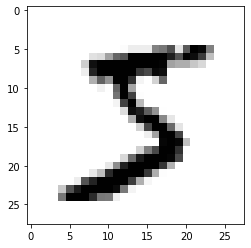

In [12]:
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')

In [13]:
y[0]

'5'

In [14]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [15]:
# Shuffling the datasets
# import numpy as np
# shuffle_index=np.random.permutation(60000)
# X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]


## Training a binary Classifier

In [16]:
#example of a binary classifier, capable of
#distinguishing between just two classes, 5 and not-5.
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

In [17]:
look=pd.DataFrame(y_train_5)

In [19]:
look.head(30)

,0
0,True
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


In [20]:
df=pd.DataFrame(y_train_5)
df.count()

0    60000
dtype: int64

In [21]:
#Lets create a Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [22]:
sgd_clf.predict([some_digit])

array([ True])

## Performance Measures

### Measuring Accuracy using cross-Validation

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds=StratifiedKFold(n_splits=3,random_state=42)

for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf=clone(sgd_clf)
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_fold=X_train[test_index]
    y_test_fold=y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

0.95035
0.96035
0.9604


In [24]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [26]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [27]:
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

In [28]:
from sklearn.model_selection import cross_val_predict
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

# Precision and Recall

In [32]:
y_train_5.shape

(60000,)

In [34]:
from sklearn.metrics import precision_score,recall_score
print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))

0.8370879772350012
0.6511713705958311


In [35]:
# It is often convenient to combine precision and recall into a single metric called the F1 score
# the classifier only gets a high f1 score if Recall and precision score is high

In [37]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

# Precision / Recall tradeoff

In [40]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [41]:
threshold=0

In [42]:
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

In [43]:
threshold=200000

In [45]:
y_some_digit_pred=(y_scores>threshold)
y_some_digit_pred

array([False])

In [46]:
#The image actually repre‐
#sents a 5, and the classifier detects it when the threshold is 0, but it misses it when the
#threshold is increased to 200,000.

<p> So how can you decide which threshold to use? For this you will first need to get the
scores of all instances in the training set using the cross_val_predict() function
again, but this time specifying that you want it to return decision scores instead of
predictions : </p>

In [48]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

<p> Now with these scores you can compute precision and recall for all possible thresh
olds using the precision_recall_curve() function: </p>

In [50]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds=precision_recall_curve(y_train_5,y_scores)

In [55]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    plt.xlim([-60000,60000])


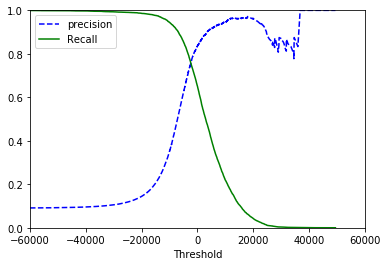

<Figure size 1440x360 with 0 Axes>

In [57]:
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

<p> So let’s suppose you decide to aim for 90% precision. You look up the first plot
(zooming in a bit) and find that you need to use a threshold of about 5,000. To make
predictions (on the training set for now), instead of calling the classifier’s predict()
method, you can just run this code: </p>

In [92]:
y_train_pred_90=(y_scores>5000)

In [93]:
# Now precision score
precision_score(y_train_5,y_train_pred_90)

0.9160050146259925

In [94]:
recall_score(y_train_5,y_train_pred_90)

0.40435344032466336

In [95]:
# If someone says “let’s reach 99% precision,” you should ask, “at
# what recall?”
#A high-precision classifier is
#not very useful if its recall is too low!

# the ROC Curve (receiver operating characteristic)

<p>The receiver operating characteristic (ROC) curve is another common tool used with
binary classifiers. It is very similar to the precision/recall curve, but instead of plot‐
ting precision versus recall, the ROC curve plots the true positive rate (another name
for recall) against the false positive rate. The FPR is the ratio of negative instances that
are incorrectly classified as positive. It is equal to one minus the true negative rate,
which is the ratio of negative instances that are correctly classified as negative. The
TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus
1 – specificity.
To plot the ROC curve, you first need to compute the TPR and FPR for various thres‐
hold values, using the roc_curve() function:</p>

In [96]:
from sklearn.metrics import roc_curve

In [97]:
fpr,tpr,thresholds=roc_curve(y_train_5,y_scores)

In [100]:
# plot fpr against tpr using matplotlib
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')

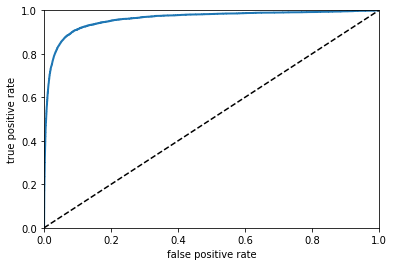

In [101]:
plot_roc_curve(fpr,tpr)
plt.show()